## Import Dependencies and Dataframe

In [1]:
import pickle as p
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from tqdm import tqdm
from dfa import dfa
import scipy.signal as sig
from sklearn.linear_model import LogisticRegression
from scipy.interpolate import interp1d
from scipy.integrate import romb
plt.rcParams.update({'font.size': 22})

In [2]:
df = p.load(open('df.p','rb'))

all_subjects = np.concatenate((np.arange(11,25),np.arange(26,45)))

In [3]:
df

Subject11  \
BVP  P1   [[2.04], [3.21], [4.15], [4.78], [5.13], [5.31...   
     P2   [[9.25], [9.82], [10.56], [11.42], [12.34], [1...   
     REC  [[7.41], [11.99], [16.93], [21.99], [27.06], [...   
     UP2  [[-0.0], [-0.0], [-0.0], [-0.0], [-0.0], [-0.0...   
     UP1  [[-7.36], [-7.43], [-7.39], [-7.3], [-7.14], [...   
EDA  P1   [[2.8816], [2.8765], [2.8496], [2.8381], [2.82...   
     P2   [[2.5755], [2.5717], [2.573], [2.573], [2.5768...   
     REC  [[2.8496], [2.8471], [2.8278], [2.7715], [2.78...   
     UP2  [[0.0], [0.8389200000000001], [1.1863], [1.596...   
     UP1  [[2.1398], [2.1321], [2.1282], [2.118000000000...   
HR   P1   [[104.45], [104.83], [105.25], [105.58], [105....   
     P2   [[76.42], [76.05], [75.72], [75.37], [75.03], ...   
     REC  [[83.05], [82.93], [82.85], [82.8], [82.77], [...   
     UP2  [[52.0], [67.5], [63.33], [61.5], [65.8], [68....   
     UP1  [[79.22], [79.62], [80.03], [80.47], [80.8], [...   
IBI  P1   [0.59378, 0.56253, 0.56253, 0.67191, 0.70316, ...   
     P2   [0.62503, 0.5469, 0.64065, 0.71878, 0.51565, 0...   
     REC  [0.59378, 0.6094, 0.53127, 0.7812899999999999,...   
     UP2  [0.5469, 0.65628, 0.50002, 0.57815, 0.64065, 0...   
     UP1  [0.56253, 0.56253, 0.75003, 0.57815, 0.67191, ...   
TEMP P1   [[33.97], [33.93], [33.93], [33.93], [33.93], ...   
     P2   [[33.59], [33.59], [33.59], [33.59], [33.59], ...   
     REC  [[33.95], [33.95], [33.95], [33.95], [33.95], ...   
     UP2  [[31.01], [31.01], [31.01], [31.01], [31.01], ...   
     UP1  [[34.34], [34.34], [34.34], [34.34], [34.34], ...   

                                                  Subject12  \
BVP  P1   [[28.27], [30.1], [30.75], [30.63], [30.25], [...   
     P2   [[-114.92], [-125.63], [-128.77], [-122.87], [...   
     REC  [[-169.0], [-175.87], [-184.74], [-192.17], [-...   
     UP2  [[-0.0], [-0.0], [-0.0], [-0.0], [-0.0], [-0.0...   
     UP1  [[55.34], [57.97], [58.52], [57.78], [56.65], ...   
EDA  P1   [[0.11785], [0.11785], [0.11657000000000001], ...   
     P2   [[0.23056999999999997], [0.22801], [0.22801], ...   
     REC  [[0.19727], [0.19727], [0.19727], [0.19727], [...   
     UP2  [[0.0], [0.83646], [1.0417], [0.9034], [0.8944...   
     UP1  [[0.17190999999999998], [0.17190999999999998],...   
HR   P1   [[68.45], [68.02], [67.58], [67.13], [66.68], ...   
     P2   [[83.67], [83.58], [83.57], [83.55], [83.47], ...   
     REC  [[88.42], [88.6], [88.8], [88.97], [89.17], [8...   
     UP2  [[59.0], [72.0], [73.0], [75.5], [72.0], [70.0...   
     UP1  [[73.97], [73.92], [73.88], [73.9], [73.92], [...   
IBI  P1   [0.75003, 0.9062899999999999, 0.78128999999999...   
     P2   [0.9219200000000001, 0.71878, 0.75003, 0.87503...   
     REC  [0.7812899999999999, 0.76566, 0.81253999999999...   
     UP2  [0.70316, 0.75003, 0.79691, 0.76566, 0.75003, ...   
     UP1  [0.7812899999999999, 0.9219200000000001, 0.875...   
TEMP P1   [[32.87], [32.87], [32.87], [32.87], [32.87], ...   
     P2   [[31.55], [31.57], [31.57], [31.57], [31.57], ...   
     REC  [[31.43], [31.43], [31.43], [31.43], [31.43], ...   
     UP2  [[27.93], [27.93], [27.93], [27.93], [27.93], ...   
     UP1  [[32.77], [32.77], [32.77], [32.77], [32.77], ...   

                                                  Subject13  \
BVP  P1   [[-9.58], [-10.18], [-10.76], [-11.41], [-12.2...   
     P2   [[25.12], [32.3], [38.41], [41.83], [41.12], [...   
     REC  [[-13.87], [-32.58], [-53.66], [-74.95], [-94....   
     UP2  [[-0.0], [-0.0], [-0.0], [-0.0], [-0.0], [-0.0...   
     UP1  [[7.9], [14.24], [18.8], [21.93], [24.0], [25....   
EDA  P1   [[0.17290999999999998], [0.17290999999999998],...   
     P2   [[0.16394], [0.16394], [0.16522], [0.16522], [...   
     REC  [[0.21645], [0.21645], [0.21773], [0.21645], [...   
     UP2  [[0.0], [0.092217], [0.13576], [0.13705], [0.1...   
     UP1  [[0.16906], [0.16906], [0.16906], [0.16906], [...   
HR   P1   [[61.95], [62.03], [62.18], [62.38], [62.58], ...   
     P2   [[65.1

## Book-Keeping Functions with Examples

In [4]:
# Book-keeping Functions
n_splits = 1

def num_to_epoch(epoch_number):
    if epoch_number == 0:
        return 'UP1'
    elif epoch_number == 1:
        return 'UP2'
    elif epoch_number == 2:
        return 'P1'
    elif epoch_number == 3:
        return 'P2'
    elif epoch_number == 4:
        return 'REC'
    else:
        raise Exception('Invalid Epoch Number')

def num_to_subject(subject_number):
    return 'Subject'+str(subject_number)

def get_signal(measure, epoch, subjno):
    if isinstance(epoch,str):
        return np.ravel(df.loc[measure, epoch][num_to_subject(subjno)])
    elif isinstance(epoch, int):
        return np.ravel(df.loc[measure, num_to_epoch(epoch)][num_to_subject(subjno)])

def get_split_signal(measure, epoch, subjno, splitno):
    if isinstance(epoch,str):
        return np.array_split(np.ravel(df.loc[measure, epoch][num_to_subject(subjno)]), n_splits)[splitno]
    elif isinstance(epoch, int):
        return np.array_split(np.ravel(df.loc[measure, num_to_epoch(epoch)][num_to_subject(subjno)]),n_splits)[splitno]
    
def full_signal(measure, subjno):
    return np.concatenate((
        np.ravel(df.loc[measure, num_to_epoch(0)][num_to_subject(subjno)]),
        np.ravel(df.loc[measure, num_to_epoch(1)][num_to_subject(subjno)]),
        np.ravel(df.loc[measure, num_to_epoch(2)][num_to_subject(subjno)]),
        np.ravel(df.loc[measure, num_to_epoch(3)][num_to_subject(subjno)]),
        np.ravel(df.loc[measure, num_to_epoch(4)][num_to_subject(subjno)]),
    ))

def is_perturbed(epoch):
    if epoch == 0 or epoch == 1 or epoch == 4:
        return 0
    elif epoch == 2 or epoch == 3:
        return 1
    
def scaled_correlation_time(signal1, signal2):
    signal1 = (signal1 - np.mean(signal1))/np.std(signal1)
    signal2 = (signal2 - np.mean(signal2))/np.std(signal2)
    acorr = np.correlate(signal1, signal2, mode='full')
    acorr = acorr[(acorr.size // 2 ):] / np.max(acorr)
#     plt.plot(acorr)
    tau = np.argmax([acorr < 1/np.exp(1)])
    return tau / len(acorr)

def correlation_integral(signal1, signal2):
    signal1 = (signal1 - np.mean(signal1))/np.std(signal1)
    signal2 = (signal2 - np.mean(signal2))/np.std(signal2)
    acorr = np.correlate(signal1, signal2, mode='full')
    acorr = acorr[(acorr.size // 2 ):] / np.max(acorr)
#     plt.plot(acorr)
    integral = np.trapz(acorr)
    return integral

def plot_full_experiment(measure, subjno):
    s1 = np.ravel(df.loc[measure, num_to_epoch(0)][num_to_subject(subjno)])
    s2 = np.ravel(df.loc[measure, num_to_epoch(1)][num_to_subject(subjno)])
    s3 = np.ravel(df.loc[measure, num_to_epoch(2)][num_to_subject(subjno)])
    s4 = np.ravel(df.loc[measure, num_to_epoch(3)][num_to_subject(subjno)])
    s5 = np.ravel(df.loc[measure, num_to_epoch(4)][num_to_subject(subjno)])
    fullsignal = np.concatenate((s1,s2,s3,s4,s5))
    plt.plot(fullsignal,'k',label = measure)
    plt.axvline(x = len(s1), color = 'k', linestyle = '--')
    plt.axvline(x = len(s1)+len(s2), color = 'k', linestyle = '--')
    plt.axvline(x = len(s1)+len(s2)+len(s3), color = 'k', linestyle = '--')
    plt.axvline(x = len(s1)+len(s2)+len(s3)+len(s4), color = 'k', linestyle = '--')
    plt.legend()

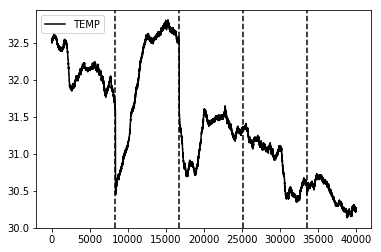

In [16]:
plot_full_experiment('TEMP',32)

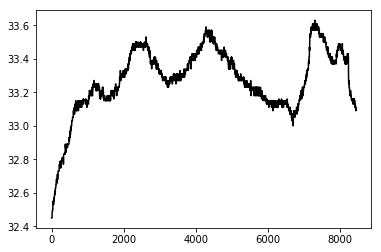

In [17]:
plt.plot(get_signal('TEMP',1,41), 'k') ## Gets the signal for any epoch, with epochs numbered 0-4

## Feature Sandbox

### Duplicate the following entire section for each function you want to write:

#### Feature 1: HR Frequency Mode

In [12]:
# Get sample signal 

signal = get_signal('HR', 3, 12)

# Define analysis function

def mode_frequency(signal):
    fs,pxx = sig.welch(signal, nfft = 1000, scaling = 'spectrum', detrend = 'constant')
    return fs[np.argmax(pxx)]

# Test function

mode_frequency(signal)

0.004

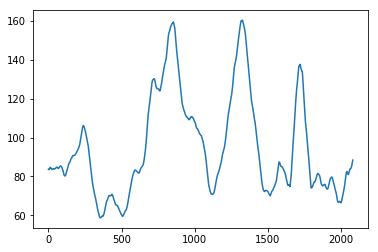

In [11]:
plt.plot(signal)

In [13]:
# Compute feature for entire dataset

allfeatures = [];

targets = [];
n_splits = 1

for subjno in tqdm(all_subjects):
    for epoch in range(4):
        for splitno in range(n_splits):
            
            hr_signal = get_split_signal('HR',epoch,subjno,splitno) ## CHANGE THIS TO WHICHEVER SIGNAL YOU WANT
            

            allfeature = mode_frequency(hr_signal) ## CHANGE THIS LINE HERE WITH YOUR OWN FUNCTION
            
            allfeatures.append(allfeature)
            targets.append(is_perturbed(epoch))

allfeature_names = ['my_feature'] ## You can leave this the way it is for simplicity. 
fdf = pd.DataFrame(allfeatures, columns = allfeature_names)

100%|██████████| 33/33 [00:00<00:00, 401.96it/s]


ANOVA P-value = 0.415


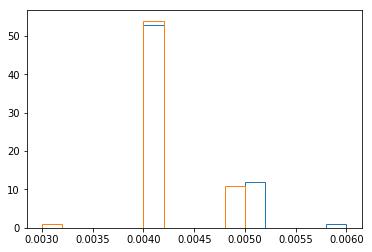

In [14]:
# Evaluate feature

targets = np.asarray(targets)
up = np.asarray(fdf['my_feature'][targets == 0])
p = np.asarray(fdf['my_feature'][targets == 1])

plt.hist(up,histtype = 'step')
plt.hist(p, histtype = 'step')

pval = stats.f_oneway(up,p)[1]
if pval < 0.1:
    print('\033[31m', 'ANOVA P-value = %.3f'%pval, '\033[0m', sep='') # Significant P-values will be colorful :)
else:
     print('ANOVA P-value = %.3f'%pval)